In [7]:
# import necesary packages
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.signal import find_peaks as fp

In [8]:
# label the columns in the data
column_labels = ['years', 'months', 'days', 'precipitation']

# read data as a frame from location
data = df = pd.read_csv(
    "./data/Synopdata/Yendi_1960_2020_dRR_cgf.txt",
    header=None, sep='\s+', names=column_labels)

In [9]:
# create a new column frame, date, to easily analyse and group data by preferred time-base
df['date'] = pd.to_datetime(df[['years', 'months', 'days']])

# Calculate the yearly mean
yearly_mean = ym = df.groupby(df.date.dt.year)[
    'precipitation'].mean()

# calculate the precipitation anomaly as the difference between the daily precipitation
# and the yearly mean precipitation
anomaly = df['anomaly'] = df.groupby(df.date.dt.year)[
    'precipitation'].transform(lambda x: x - x.mean())

# create a standard deviation function
def stand(x):
    return (x-np.nanmean(x))/np.nanstd(x)

# standardize the anomalies values
df['std_anomaly'] = std_anomaly = stand(anomaly)

# find the cumulative of the the std_anomaly
df['cstd'] = cstd = std_anomaly.cumsum()

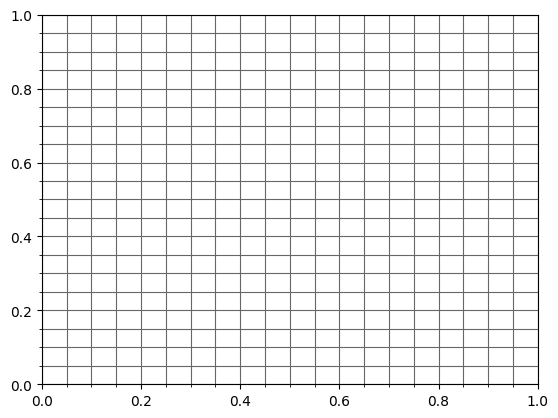

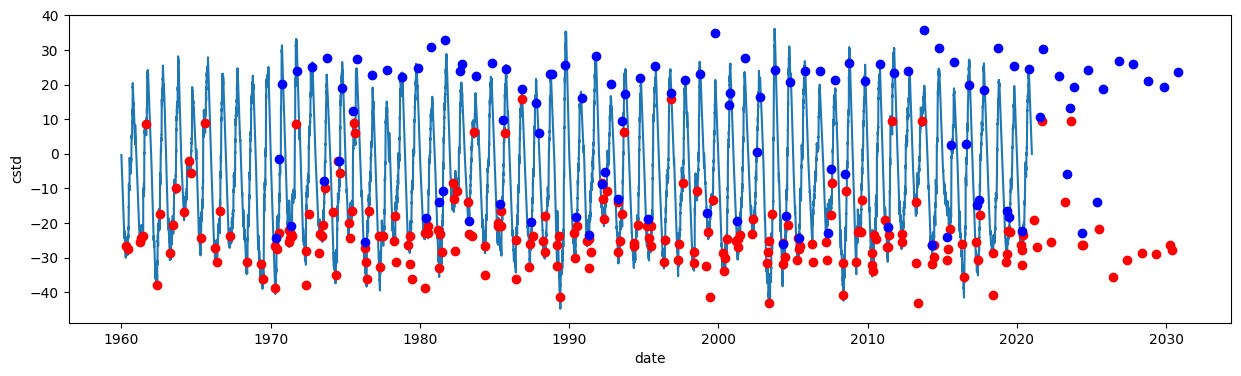

In [15]:
# create a plot of the cumulative
# create the figure
fig = plt.figure()
plt.minorticks_on()
plt.grid(visible=True, which='both', axis='both', color='#666666', linestyle='-')

plt.figure(figsize=(15, 4))
ax = plt.subplot()
sb.lineplot(data=df, x='date', y='cstd', ax=ax)

# finding the onset and cessation
anomalyx = cstd.values

#df[['date', 'cstd']].set_index('date')['1969':'1969'].plot()


def onset_cessation_estimation(anomalyx, dx=28):
    onset = []
    cessation = []
    for i in range(dx, len(anomalyx)-dx):
        if min(anomalyx[i-dx:i+dx]) == anomalyx[i]:
            onset.append([i+1, anomalyx[i+1]])
        if max(anomalyx[i-dx:i+dx]) == anomalyx[i]:
            cessation.append([i+1, anomalyx[i+1]])
    onset = np.copy(onset).T
    cessation = np.copy(cessation).T
    return onset, cessation

onset, cessation = onset_cessation_estimation(df['cstd'], dx=28)

yr_onsets = [df.loc[x, 'date'].strftime('%Y%m%d') for x in onset[0]]
PLT_onsets = [df.loc[x, 'date'] for x in onset[0]]

ax.plot(PLT_onsets, onset[1], 'ro')

ax.plot(onset[0], onset[1], 'ro')
ax.plot(cessation[0], cessation[1], 'bo')